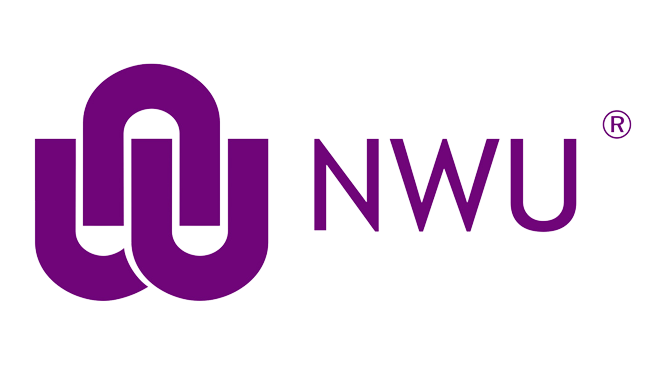

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname: Nkanyiso Msimango
*   # University Number: 37312030


# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 11/ 08/ 2025 (Monday)


# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [54]:
#  Import required libraries
import pandas as pd
import numpy as np

#  Function to extract population data for a given country
def year_population(country_name: str,
                    world_csv='/content/world_population.csv',
                    countries_csv='/content/countries.csv') -> pd.DataFrame:
    # Load datasets
    countries = pd.read_csv(countries_csv)
    world = pd.read_csv(world_csv)

    # Case-insensitive matching
    match_series = countries['Country Name'].str.strip().str.lower()
    target = country_name.strip().lower()

    if target not in match_series.values:
        raise ValueError(f"Country '{country_name}' not found in {countries_csv}.")

    # Get row index and population data
    row_idx = int(match_series[match_series == target].index[0])
    pop_row = world.iloc[row_idx]

    # Convert to DataFrame
    years = list(map(int, pop_row.index))
    pops = pop_row.values.astype(float)

    result_df = pd.DataFrame({
        "year": years,
        "population": pops  #  fixed column name
    }).sort_values("year").reset_index(drop=True)

    return result_df

#  Output: Aruba population data
df_aruba = year_population("Aruba")
df_aruba


,year,population
0,1960,54211.0
1,1961,55438.0
2,1962,56225.0
3,1963,56695.0
4,1964,57032.0
5,1965,57360.0
6,1966,57715.0
7,1967,58055.0
8,1968,58386.0
9,1969,58726.0


# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.

_**Use the results in Question 1 as Inputs:**_
```python
data = get_year_pop('Aruba')
data_split(data)
```
>

In [55]:
#  Import train_test_split
from sklearn.model_selection import train_test_split

#  Function to split data
def data_split(df: pd.DataFrame, test_fraction: float = 0.2, random_seed: int = 42):
    # Validate required columns
    required_columns = {'year', 'population'}
    actual_columns = set(col.lower() for col in df.columns)

    if not required_columns.issubset(actual_columns):
        raise ValueError(f"DataFrame must contain {required_columns}. Found: {df.columns}")

    # Prepare features and target
    X = df['year'].to_numpy().reshape(-1, 1)
    y = df['population'].to_numpy()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_fraction,
        random_state=random_seed,
        shuffle=True
    )

    return X_train, X_test, y_train, y_test

# Output: Split Aruba data
X_train, X_test, y_train, y_test = data_split(df_aruba)
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 46
Testing samples: 12


# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

In [56]:
#  Import LinearRegression
from sklearn.linear_model import LinearRegression

#  Function to train model
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

#  Output: Train model on Aruba data
model_aruba = train_linear_model(X_train, y_train)
print("Model slope:", model_aruba.coef_[0])
print("Model intercept:", model_aruba.intercept_)


Model slope: 1054.9714568553043
Model intercept: -2023406.8363808522


# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

=== Aruba Model Evaluation ===


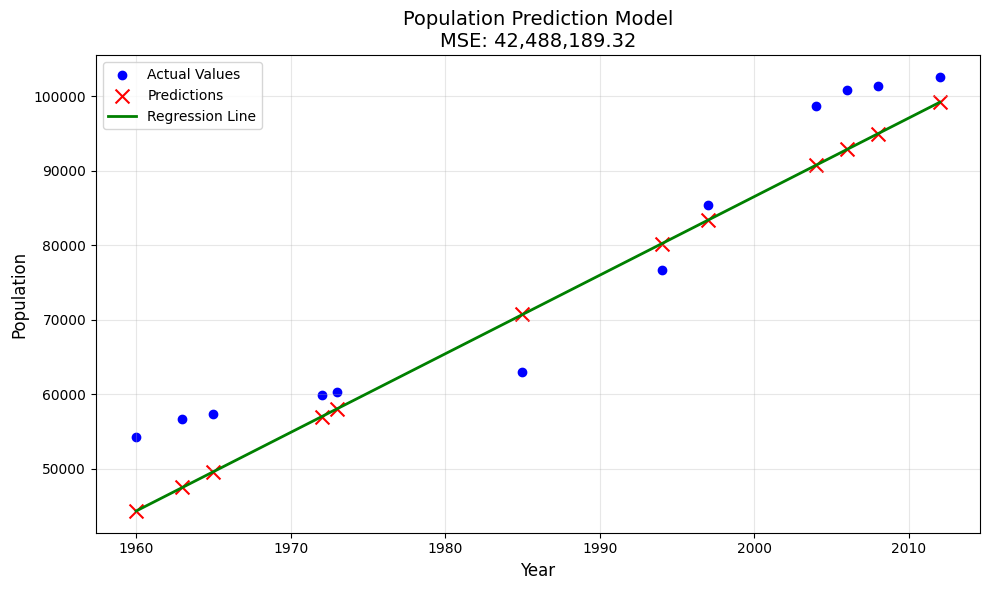


Test MSE: 42,488,189.32
RMSE: 6,518.30
R-squared: 0.885


In [58]:
#  Import metrics and plotting
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#  Function to test model and plot results
def test_model(model, X_test, y_test, plot_results: bool = True):
    # Predict
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse_val = mean_squared_error(y_test, y_pred)

    # Plot if requested
    if plot_results:
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_test, color='blue', label='Actual Values')
        plt.scatter(X_test, y_pred, color='red', marker='x', s=100, label='Predictions')
        plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_test, axis=0)), color='green', linewidth=2, label='Regression Line')
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Population", fontsize=12)
        plt.title(f"Population Prediction Model\nMSE: {mse_val:,.2f}", fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    return mse_val, y_pred

#  Output: Evaluate Aruba model
print("=== Aruba Model Evaluation ===")
mse_aruba, preds_aruba = test_model(model_aruba, X_test, y_test)
print(f"\nTest MSE: {mse_aruba:,.2f}")
print(f"RMSE: {np.sqrt(mse_aruba):,.2f}")
print(f"R-squared: {model_aruba.score(X_test, y_test):.3f}")
